In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pfad combined
base_path = '/Users/am/Desktop/CF Data Analysis essentials /2_Data Analytics Immersions_2 von 3/4 Phyton/4.9'
combined_pickle_path = os.path.join(base_path, 'ords_prods_merge_final_491Intro.pkl')

# Load data
df = pd.read_pickle(combined_pickle_path)

print(df.head())
print(df.shape)


   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  ...  \
0                     NaN         196                  1          0  ...   
1                    15.0         196                  1          1  ...   
2                    21.0         196                  1          1  ...   
3                    29.0         196                  1          1  ...   
4                    28.0         196                  1          1  ...   

    order_frequency_flag first_name  surname  Gender    state  age  \
0  Non-fre

In [14]:
# --- 4. Set consistent theme and color ---
sns.set_style("whitegrid")
light_red = '#ff9999'  # soft red
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[light_red])
sns.set_palette([light_red])  # applies to countplots, etc.

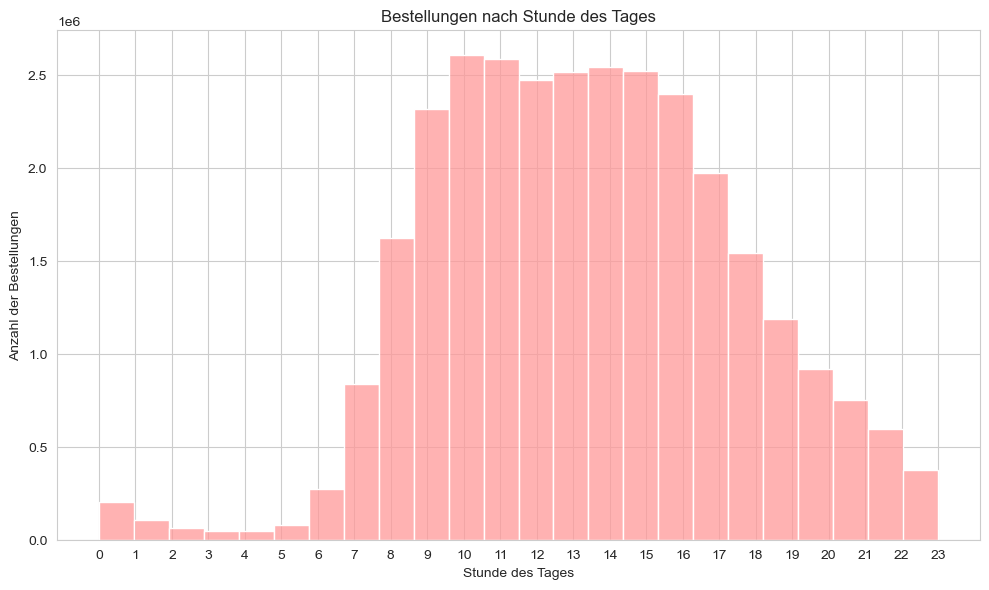

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(df['order_hour_of_day'], bins=24, kde=False)
plt.title('Bestellungen nach Stunde des Tages')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Bestellungen')
plt.xticks(range(0,24))
plt.tight_layout()
plt.savefig(os.path.join(base_path, 'histogram_order_hour_of_day.png'))
plt.show()


In [ ]:
# This bar chart displays the number of orders placed at each hour of the day (from 0 to 23). The y-axis is labeled "Anzahl der Bestellungen" (Number of Orders). The x-axis shows the hour of the day (in 24-hour format).  Knowing peak hours helps in staffing, inventory planning, and system load handling.

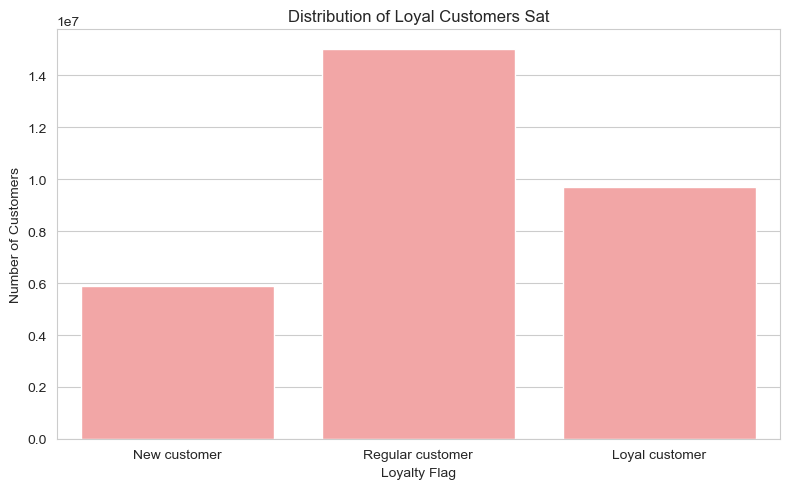

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='loyalty_flag', data=df)
plt.title('Distribution of Loyal Customers Sat')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Customers')
plt.tight_layout()

plt.savefig(os.path.join(base_path, 'bar_loyalty_flag.png'))
plt.show()

In [1]:
#Regular customers make up the largest group by far.
#Loyal customers come second.
#New customers are the smallest group.
#The business has a strong base of returning (regular) customers, which is a positive sign. There may be room to convert more regulars into loyal customers through loyalty programs, incentives, or personalized offers.
#Marketing efforts might also be focused on acquiring more new customers to grow the base.

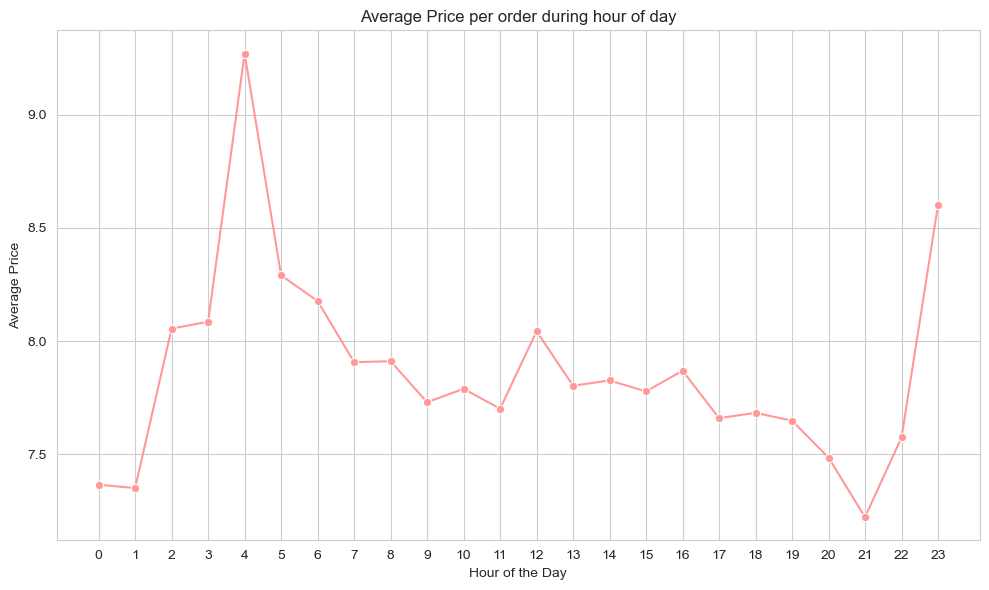

In [27]:
# Test 
df_sample = df.sample(10000, random_state=42)

# Averageprice per hour 
avg_price_by_hour = df_sample.groupby('order_hour_of_day')['prices'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='order_hour_of_day', y='prices', data=avg_price_by_hour, marker='o')
plt.title('Average Price per order during hour of day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.xticks(range(0,24))
plt.tight_layout()

plt.savefig(os.path.join(base_path, 'line_avg_price_by_hour.png'))
plt.show()


In [28]:
#Average Order Price by Hour (Chart 3):
#Highest prices at 3–4 AM and 23:00.
#Lower prices during peak hours (9:00–17:00), suggesting smaller routine orders.  
#IDEAS
#Run targeted promos during peak hours to boost average basket size and analyze late-night orders to understand why they're higher in value. Offer value deals during off-peak hours to increase order volume.

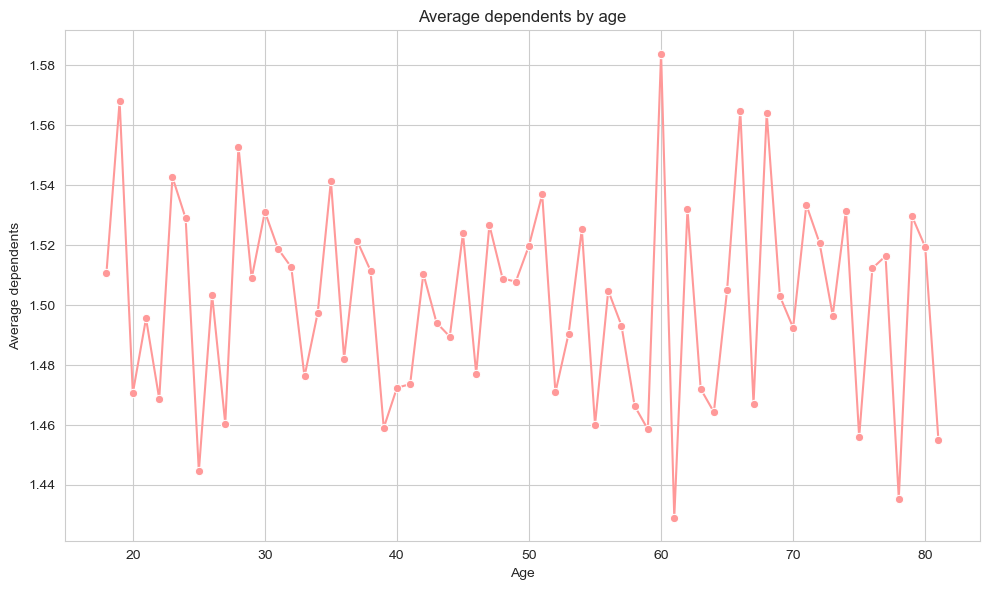

In [18]:
# Average Number of group by age
avg_dependents_by_age = df.groupby('age')['num_dependants'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='age', y='num_dependants', data=avg_dependents_by_age, marker='o')
plt.title('Average dependents by age')
plt.xlabel('Age')
plt.ylabel('Average dependents')
plt.tight_layout()

plt.savefig(os.path.join(base_path, 'line_age_dependants.png'))
plt.show()


In [ ]:
#Most age groups cluster around 1.4–1.5 dependents.
#Slight increases at early (20s) and later (60) ages may reflect young families and multi-generational households

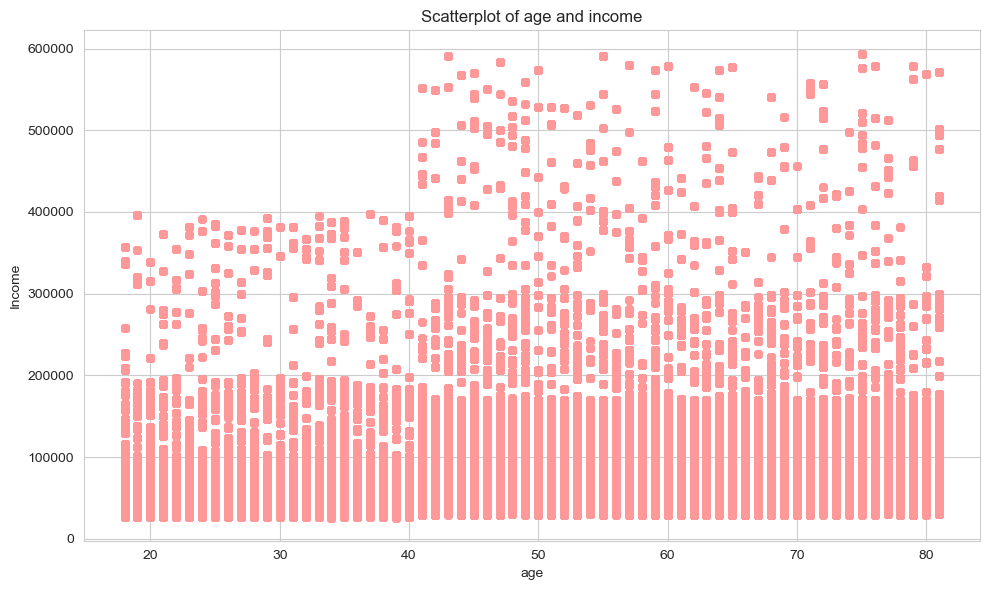

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='income', data=df, alpha=0.5, edgecolor=None)
plt.title('Scatterplot of age and income')
plt.xlabel('age')
plt.ylabel('Income')
plt.tight_layout()

plt.savefig(os.path.join(base_path, 'scatter_age_income.png'))
plt.show()


In [31]:
df.to_pickle(os.path.join(base_path, 'ords_prods_customers_updated_part22.pkl'))



In [33]:
#Scatterplot Interpretation – Age vs. Income
#The scatterplot shows a clear trend: #Customers over 40 years old tend 
#to have higher incomes, often ranging from $40k to $60k and above. 
#This demographic may also have more dependents or family responsibilities, 
#which typically results in greater household spending and higher basket values.Implication for Grocery Delivery:
#Older customers often have higher buying power and are willing to spend more per order.
#This makes them an attractive segment — similar to how they're frequently targeted by automotive and insurance industries.
#However, purchasing frequency may be lower in this group.
#On the Other Hand – Younger Customers:
#While they may have lower income and smaller order sizes, they tend to shop more frequently.
#This behavior makes them a valuable segment for repeat business, subscriptions, or loyalty programs.
#It would be worth investigating this further in the data:
#Do younger users have shorter intervals between orders?
#Are they more likely to reorder popular items?
#Could tailored offers encourage them to increase basket size over time?